In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
comments=pd.read_csv('F:\Github repos\Youtube Analysis/GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0

# Importing TextBlob 

In [4]:
!pip install textblob

In [5]:
from textblob import TextBlob

In [6]:
TextBlob('Its more accurate to call it the M+ (1000) be... ').sentiment.polarity

0.45000000000000007

In [7]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [8]:
comments.dropna(inplace=True)

In [9]:
polarity=[]

for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)
        

In [10]:
comments['polarity']=polarity

In [11]:
comments.head(15)

video_id                                       comment_text  likes  \
0   jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1   jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2   jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3   jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4   jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
5   jt2OHQh0HoQ  Keep calm and buy iphone 8 Keep calm and buy i...      0   
6   jt2OHQh0HoQ      i am a big fan of youtube and u !!!!!!!!!!!!!      0   
7   jt2OHQh0HoQ  You will never find Losers who line up and pay...      0   
8   jt2OHQh0HoQ  *APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...      0   
9   jt2OHQh0HoQ  I'm only here to see Emma, I love her so much!...      0   
10  jt2OHQh0HoQ           Mom said: Just one more video before bed      0   
11  jt2OHQh0HoQ                           what is the song?? 39:20      0   
12  jt2OHQh0HoQ  I started crying at 49:01 when Emma's EP showe...      0   
13  jt2OHQh0HoQ  3 years late on wireless charging, 3 years lat...      0   
14  jt2OHQh0HoQ                             more one before to bed      0   

    replies  polarity  
0         0  0.450000  
1         0  0.000000  
2         0  0.000000  
3         0  0.000000  
4         0  1.000000  
5         0  0.300000  
6         0  0.000000  
7         0 -0.100000  
8         0  0.028571  
9         0  0.500000  
10        0  0.500000  
11        0  0.000000  
12        0  0.300000  
13        0  0.026563  
14        0  0.500000

# Performing Exploratory Data Analysis on Positive Comments

In [12]:
comments_positive=comments[comments['polarity']==1]

In [13]:
comments_positive.shape

(20400, 5)

In [14]:
comments_positive.head()

video_id                                       comment_text  likes  \
4    jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
26   jt2OHQh0HoQ            The best thing to ever happen to iPhone      0   
80   jt2OHQh0HoQ  Apple is always awesome \n\nhttps://youtu.be/r...      0   
158  YPVcg45W0z4  das a lot of edditing you have done there ... ...      0   
175  YPVcg45W0z4                        Welcome to the Scandiworld!      0   

     replies  polarity  
4          0       1.0  
26         2       1.0  
80         1       1.0  
158        0       1.0  
175        0       1.0

In [15]:
!pip install wordcloud

In [16]:
from wordcloud import WordCloud,STOPWORDS

In [17]:
stopwords=set(STOPWORDS)

In [18]:
comments_positive['comment_text']

4         Power is the disease.  Care is the cure.  Keep...
26                  The best thing to ever happen to iPhone
80        Apple is always awesome \n\nhttps://youtu.be/r...
158       das a lot of edditing you have done there ... ...
175                             Welcome to the Scandiworld!
                                ...                        
718390    I'm just stopping the video three minutes in t...
718416    Beating up tommy wiseu was the best part of th...
718432                           kudos for the mtg cards :D
718440                     Tommy Wiseau is my greatest fear
718443                                             The best
Name: comment_text, Length: 20400, dtype: object

In [19]:
total_comments=''.join(comments_positive['comment_text'])

In [20]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

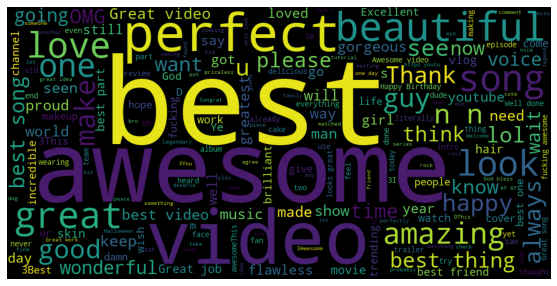

In [21]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Performing Exploratory Data Analysis on Negative Comments

In [22]:
comments_negative=comments[comments['polarity']==-1]

In [23]:
total_comments=''.join(comments_negative['comment_text'])

In [24]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

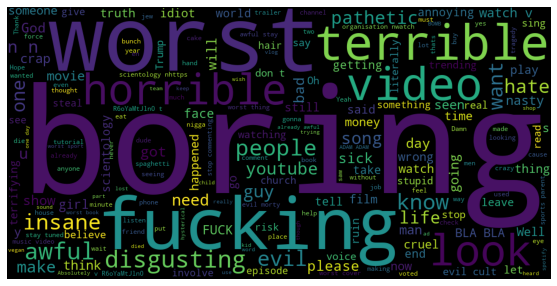

In [25]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

# Analyzing Trending Tags on YouTube

In [26]:
videos=pd.read_csv('F:\Github repos\Youtube Analysis/USvideos.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [27]:
videos.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [28]:
videos['tags']

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [29]:
tags_complete=''.join(videos['tags'])

In [30]:
tags_complete

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 lifeApple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone[none]apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|vergejacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emojia24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar winne

In [31]:
import re

In [32]:
tags=re.sub('[^a-zA-Z]',' ',tags_complete)

In [33]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   lifeApple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge vergejacksfilms parody parodies iphone iphone x iphone   apple emojia   a   films a   trailers independent films trailer HD official movie film a   movies oscar winne

In [34]:
tags=re.sub(' +',' ',tags)

In [35]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

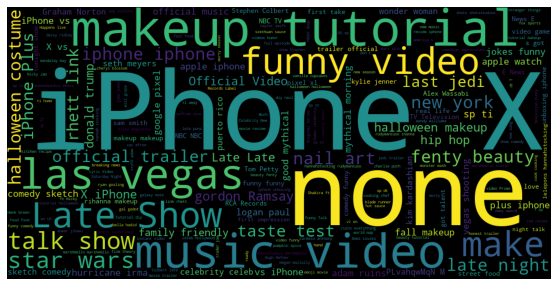

In [36]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

Text(0.5, 1.0, 'Regression plot for views and likes')

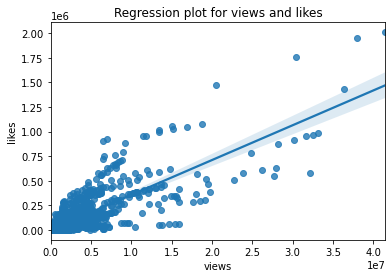

In [37]:
sns.regplot(data=videos,x='views',y='likes')
plt.title('Regression plot for views and likes')

Text(0.5, 1.0, 'Regression plot for views and dislikes')

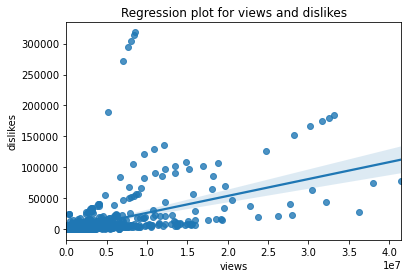

In [38]:
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('Regression plot for views and dislikes')

In [39]:
df_corr=videos[['views','likes','dislikes']]

In [40]:
df_corr.corr()

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

<AxesSubplot:>

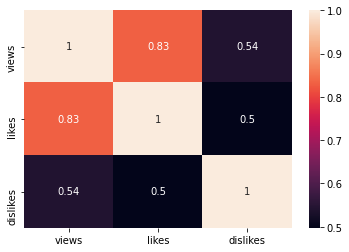

In [41]:
sns.heatmap(df_corr.corr(),annot=True)

# Analyzing Emoji's in comments

In [42]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

In [43]:
comments['comment_text'][1]

'To be there with a samsung phone\\n😂😂😂'

In [44]:
print('\U0001F600')

😀


In [45]:
!pip install emoji==0.6.0

In [47]:
import emoji

In [48]:
len(comments)

718424

In [49]:
comment=comments['comment_text'][1]

In [50]:
[c for c in comment if c in emoji.UNICODE_EMOJI]

['😂', '😂', '😂']

In [52]:
str=' '

for i in comments['comment_text']:

    list=[c for c in i if c in emoji.UNICODE_EMOJI]

    for ele in list:

        str=str+ele

In [53]:
len(str)

341869

In [54]:
str

' 😂😂😂😭😭😭😢😢😢❤❤😂👏👇👇👇👇👇👇👇👇👇👇🌞😎😣😥😫😭✌😂👎🏻👎🏻👎🏻👎🏻😂🖕😘😘▶⏭⏮◀🔥🔥😊😊🤔🤔😂😂😂😂👏🏻👏🏻❤❤😜😍😍😅❤😍😍✌😂😂😂😊😂😂😂😂😏😏🇪🇸😭💔😊❤❤❤❤❤😂😂😊❤😂🤣✨🌈😘😂😂❤😊😂😊😂💗😂😊😊😊💖🐢😉😍😂😂💗💗😻😻❤😂😂❤❤🤗👌🏼👌🏼😂😂😂😂💖😩🙊♥♥♥😂😂😂💙💙💙💙💙💙😂😂😂❤❤❤😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😱😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😎😎😎😎😎😎😎😍😍😍😍😍😍😘😘😘😘😘😘😘😲🖕💪🤘💓☺☺😂😂😂💕😄😄😍💕😉😩❤❤💕❤😂💕😍💗👫💖😆💕💖💕😍😍😊😄😍😀💗🦄😍😊😂😊👍😍♥❤😂👶🏻🤗☺😘💙💙💙😍😍😊😎🤘🖤👌👌😍😂👌🍍😎😎😄😄😄😄😂😂😂😬💜💜💜😭😂😍😍💖😂😂😂😂😂😂😂😭😂😭😂😭😂😂😂😍😍😍😭😍😍😂👀👀🤔😂😂😂😂😂😂😂😂😂😂🍸🍸🍸🍸🍸😂😂😂🤣🤣🤣😂😂😂😂😍💜💜💜💜😂😂😂😅😂😍💖😂😻😉🔥❤😻❤😭😭😭😭😭😭😭👍🏻😍💚💙❤❤😫❤❤❤❤❤♥😍❤😊😍😎💄🐐😅😂😂😊😊👀👌🏽❤❤❤😂💖🎉💪💪🏽😎🙌🙌😜❤❤💛💛😎🙏💚🎉🎉❤🎉🎉🎉🎉🎊🎉🎊🎉😭💗😍😍😍😍😍😍😍👏✌😁❤❤😂💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕❤😍🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😊❤❤❤❤🍔🍟🇺🇸😒🌿😄😄😄😉🍲🍱🎏❤💪👊🏽😘😂😂😂❤🙋☺😍😍😚💕😉😂❤❤😊☺💓🌸🙄🙄🙄🙁😞😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😉👍🏻🔥💯🚨😊☺😂😂😂🤣🙂❤❤😀😀😀♥♥😂❤😂😓😭😂❤❤😖😖😂😂😂💗💝😘💐💐💐😂😍☺😂❤😭💕🙌🏽🙌🏽🙌🏽😘😘❤❤💖😫😖📱😂😏🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😁🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😎😂😂👍🏼💯💕♥♥♥😱😱😱❤❤❤😍😍😩😩😩😩😩😩😩😍😻😻😻😻😻😳🥀♥♥♥♥♥♥😍😍😍🙃😂💕💕💕😍💕💕❤❤💕😍🍫🌹💖🇸🇸🇸🇸❤😍👸🏿👸🏿👸🏿👸🏿👸🏿💗😊😊😩❤👌🏼😻😊😍❤😂😂👏🏼❤❤❤❤❤😍😍😍💚💚💚💚💚😍😭🌹😍❤😍😍😍💚💚💚💚💚😍💚💚💚☺💙😀😍💚😕😍👌😂😂😂😍👌🏻💗❤💚💚💚😸😙😙😘💚💚💚💚😍😭😭💖💓💓💓😍❤😘😘🤗🤗🤗❤😀😀💓💓💓❤😂❤😍❤❤♥♥♥❤🙌❤😂❤❤😍❤💜😍😭😍😍😍😊💗💕😍❤💗💗💛💛💛💖💖😍😐😍😍😍😍🗿😂🤗😩😩😩💖💖💖❤❤❤❤❤😍😍✨😍👍🏻😁😂😍💅❤😘❤❤😈👀😄😈👍☝👆✊👌✌👊✋👋👏👐👉👈💔😂😂😬😭😥☺😂😂😂😂😍😍😍😜😂😂😂😂😂😒👎🏽😱😱😱😱😂😎😛🙊✊✌😑😑😑👌

In [58]:
result={}
for i in set(str):
    result[i]=str.count(i)

In [59]:
result

{'🚪': 16,
 '🌩': 16,
 '🏥': 7,
 '📚': 39,
 '😨': 390,
 '⛴': 5,
 '☄': 23,
 '😼': 31,
 '☹': 194,
 '🎉': 833,
 '✅': 128,
 '⚡': 196,
 '🥝': 4,
 '🌔': 15,
 '🌭': 25,
 '😞': 415,
 '💐': 118,
 '📯': 23,
 '⛽': 30,
 '🗻': 11,
 '💤': 84,
 '🚚': 12,
 '👇': 297,
 '🧜': 5,
 '🏌': 4,
 '🐱': 149,
 '🌉': 6,
 '🔞': 20,
 '🌮': 57,
 '💳': 41,
 '🙊': 186,
 '🍐': 12,
 '🖇': 4,
 '❤': 36780,
 '💇': 26,
 '⭕': 18,
 '🥄': 3,
 '🎨': 33,
 '📭': 8,
 '✂': 13,
 '🌿': 38,
 '📋': 9,
 '🎬': 35,
 '📴': 19,
 '🎎': 8,
 '🅰': 14,
 '😤': 287,
 '😃': 1327,
 '🕯': 9,
 '🌋': 42,
 '🎡': 20,
 '😲': 411,
 '🏳': 92,
 '🔰': 19,
 '♊': 9,
 '😷': 177,
 '🔆': 44,
 '🚫': 54,
 '🚳': 10,
 '🆔': 5,
 '👛': 16,
 '☺': 1481,
 '🇷': 1575,
 '📝': 16,
 '🛅': 6,
 '🦊': 8,
 '🚮': 19,
 '🍘': 10,
 '🚦': 6,
 '🦂': 15,
 '🥊': 8,
 '🏖': 15,
 '🕓': 11,
 '🌒': 18,
 '📏': 20,
 '🍹': 37,
 '📨': 8,
 '🙏': 1886,
 '☮': 34,
 '🍇': 24,
 '🛫': 8,
 '☝': 187,
 '🐻': 59,
 '🐚': 20,
 '↪': 5,
 '🚋': 7,
 '🏰': 12,
 '🖋': 7,
 '🐫': 22,
 '📈': 12,
 '🇳': 163,
 '⬆': 23,
 '🇬': 199,
 '⚪': 56,
 '🐌': 15,
 '🌬': 8,
 '⏪': 14,
 '🎣': 27,
 '🍤': 16,
 '🐂': 4

In [60]:
result.items()

dict_items([('🚪', 16), ('🌩', 16), ('🏥', 7), ('📚', 39), ('😨', 390), ('⛴', 5), ('☄', 23), ('😼', 31), ('☹', 194), ('🎉', 833), ('✅', 128), ('⚡', 196), ('🥝', 4), ('🌔', 15), ('🌭', 25), ('😞', 415), ('💐', 118), ('📯', 23), ('⛽', 30), ('🗻', 11), ('💤', 84), ('🚚', 12), ('👇', 297), ('🧜', 5), ('🏌', 4), ('🐱', 149), ('🌉', 6), ('🔞', 20), ('🌮', 57), ('💳', 41), ('🙊', 186), ('🍐', 12), ('🖇', 4), ('❤', 36780), ('💇', 26), ('⭕', 18), ('🥄', 3), ('🎨', 33), ('📭', 8), ('✂', 13), ('🌿', 38), ('📋', 9), ('🎬', 35), ('📴', 19), ('🎎', 8), ('🅰', 14), ('😤', 287), ('😃', 1327), ('🕯', 9), ('🌋', 42), ('🎡', 20), ('😲', 411), ('🏳', 92), ('🔰', 19), ('♊', 9), ('😷', 177), ('🔆', 44), ('🚫', 54), ('🚳', 10), ('🆔', 5), ('👛', 16), ('☺', 1481), ('🇷', 1575), ('📝', 16), ('🛅', 6), ('🦊', 8), ('🚮', 19), ('🍘', 10), ('🚦', 6), ('🦂', 15), ('🥊', 8), ('🏖', 15), ('🕓', 11), ('🌒', 18), ('📏', 20), ('🍹', 37), ('📨', 8), ('🙏', 1886), ('☮', 34), ('🍇', 24), ('🛫', 8), ('☝', 187), ('🐻', 59), ('🐚', 20), ('↪', 5), ('🚋', 7), ('🏰', 12), ('🖋', 7), ('🐫', 22), ('📈', 1

In [63]:
final={}
for key,value in sorted(result.items(),key=lambda item:item[1]):
     final[key]=value

In [64]:
final

{'🥌': 1,
 '🥚': 1,
 '🤟': 1,
 ' ': 1,
 '🥜': 1,
 '🦏': 1,
 '🥟': 1,
 '🛷': 1,
 '🛒': 1,
 '🤾': 1,
 '🥡': 1,
 '🦓': 1,
 '🤺': 1,
 '🧣': 1,
 '🤹': 1,
 '🥨': 1,
 '🧤': 1,
 '🤽': 1,
 '🧠': 1,
 '🦔': 2,
 '🦖': 2,
 '🧘': 2,
 '🧒': 2,
 '🤱': 2,
 '🦕': 2,
 '🧛': 2,
 '🧝': 2,
 '🥅': 2,
 '🧡': 2,
 '🧢': 2,
 '🎌': 2,
 '🥄': 3,
 '🧐': 3,
 '🤯': 3,
 '🤫': 3,
 '🤨': 3,
 '🥖': 3,
 '🥝': 4,
 '🏌': 4,
 '🖇': 4,
 '🗓': 4,
 '♾': 4,
 '☸': 4,
 '⚙': 4,
 '🛢': 4,
 '🦍': 4,
 '🧟': 4,
 '🖍': 4,
 '⏏': 4,
 '🛬': 4,
 '🦐': 4,
 '🥞': 4,
 '♟': 4,
 '🛣': 4,
 '🦆': 4,
 '⏯': 4,
 '🤵': 4,
 '⏹': 4,
 '⏲': 4,
 '💹': 4,
 '🤬': 4,
 '☦': 4,
 '🗄': 4,
 '🏷': 4,
 '🥈': 4,
 '🗂': 4,
 '⚗': 4,
 '⏸': 4,
 '⛴': 5,
 '🧜': 5,
 '🆔': 5,
 '↪': 5,
 '⛱': 5,
 '🛤': 5,
 '🕎': 5,
 '🔃': 5,
 '🥉': 5,
 '☂': 5,
 '🈹': 5,
 '🖲': 5,
 '🔖': 5,
 '🔢': 5,
 '🔼': 5,
 '◽': 5,
 '🔚': 5,
 '🖊': 5,
 '🈂': 5,
 '🖼': 5,
 '🔤': 5,
 '🏮': 5,
 '🔳': 5,
 '❎': 5,
 '🔣': 5,
 '◻': 5,
 '🔡': 5,
 '⏺': 5,
 '↖': 5,
 '✡': 5,
 '🚁': 5,
 '🚟': 5,
 '🆎': 5,
 '🈲': 5,
 '🚠': 5,
 '🈯': 5,
 '🆖': 5,
 '🗜': 5,
 '🚻': 5,
 '⚾': 5,
 '🛂': 5,
 '🖨': 5,
 '↩': 5,
 

In [65]:
keys=[*final.keys()]

In [66]:
keys

['🥌',
 '🥚',
 '🤟',
 ' ',
 '🥜',
 '🦏',
 '🥟',
 '🛷',
 '🛒',
 '🤾',
 '🥡',
 '🦓',
 '🤺',
 '🧣',
 '🤹',
 '🥨',
 '🧤',
 '🤽',
 '🧠',
 '🦔',
 '🦖',
 '🧘',
 '🧒',
 '🤱',
 '🦕',
 '🧛',
 '🧝',
 '🥅',
 '🧡',
 '🧢',
 '🎌',
 '🥄',
 '🧐',
 '🤯',
 '🤫',
 '🤨',
 '🥖',
 '🥝',
 '🏌',
 '🖇',
 '🗓',
 '♾',
 '☸',
 '⚙',
 '🛢',
 '🦍',
 '🧟',
 '🖍',
 '⏏',
 '🛬',
 '🦐',
 '🥞',
 '♟',
 '🛣',
 '🦆',
 '⏯',
 '🤵',
 '⏹',
 '⏲',
 '💹',
 '🤬',
 '☦',
 '🗄',
 '🏷',
 '🥈',
 '🗂',
 '⚗',
 '⏸',
 '⛴',
 '🧜',
 '🆔',
 '↪',
 '⛱',
 '🛤',
 '🕎',
 '🔃',
 '🥉',
 '☂',
 '🈹',
 '🖲',
 '🔖',
 '🔢',
 '🔼',
 '◽',
 '🔚',
 '🖊',
 '🈂',
 '🖼',
 '🔤',
 '🏮',
 '🔳',
 '❎',
 '🔣',
 '◻',
 '🔡',
 '⏺',
 '↖',
 '✡',
 '🚁',
 '🚟',
 '🆎',
 '🈲',
 '🚠',
 '🈯',
 '🆖',
 '🗜',
 '🚻',
 '⚾',
 '🛂',
 '🖨',
 '↩',
 '🚛',
 '🔠',
 '🕹',
 '🗃',
 '🛥',
 '🌫',
 '🔁',
 '↕',
 '♦',
 '♠',
 '🧖',
 '🥛',
 '㊙',
 '🚎',
 '↔',
 '⌨',
 'ℹ',
 '🔄',
 '🈳',
 '🚉',
 '🗒',
 '🔲',
 '🛋',
 '🔂',
 '⚒',
 '🈁',
 '🎐',
 '🈴',
 '⛸',
 '🤮',
 '🈵',
 '🦒',
 '🗳',
 '⛏',
 '🗞',
 '➿',
 'Ⓜ',
 '🌉',
 '🛅',
 '🚦',
 '⏫',
 '🧙',
 '🚺',
 '🛃',
 '🚃',
 '🏧',
 '🛠',
 '🗾',
 '🎟',
 '🎑',
 '🚹',
 '🕍',
 '📵',
 '🚄',
 '㊗',
 '🏤'

In [67]:
values=[*final.values()]

In [68]:
values

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,


In [69]:
df=pd.DataFrame({'chars':keys[-20:],'num':values[-20]})

In [70]:
df

chars   num
0      🙌  2734
1      🏼  2734
2      💙  2734
3      💗  2734
4      👌  2734
5      💜  2734
6      🏻  2734
7      💖  2734
8      😊  2734
9      👏  2734
10     😬  2734
11     👍  2734
12     😘  2734
13     💕  2734
14     ♥  2734
15     😭  2734
16     🔥  2734
17     😍  2734
18     ❤  2734
19     😂  2734

In [74]:
!pip install plotly

  Using cached plotly-4.14.3-py2.py3-none-any.whl (13.2 MB)
  Using cached retrying-1.3.3.tar.gz (10 kB)
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=db2ba2ef14a1978e7b1e86d3a55456e8be8fb12d99844fa0e7b43f9873f3d96b
  Stored in directory: c:\users\ampolu nisha\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [75]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [77]:
trace=go.Bar(
x=df['chars'],
y=df['num']
)

iplot([trace])